<h1>A short data project - UK rainfall</h1>

In [1]:
#prevent matplot from using popup visualisations
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pylab
import matplotlib.patches as mpatches

In [2]:
rain_df = pd.read_csv('data/uk_rain_2014.csv')

In [3]:
rain_df.head()

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


<h2>Notes</h2>
<p>
    <ul>
        <li><strong>Outflow</strong>: Not sure if meteorology (airflow from storm) or hydrology (water flow out of system) definition applies! Think hydrology definition is more likely.</li>
        <li><strong>Water year</strong> perhaps should be converted to a date type.</li>
        <li>Table contains columns with values representing a year's measurements (<strong>Rain (mm) Oct-Sep</strong> and <strong>Outflow (mm) Oct-Sep</strong>), alongside four columns each of which represents a period of three months (<strong>Rain (mm) Dec-Feb</strong> etc).</li>
    </ul>
</p>

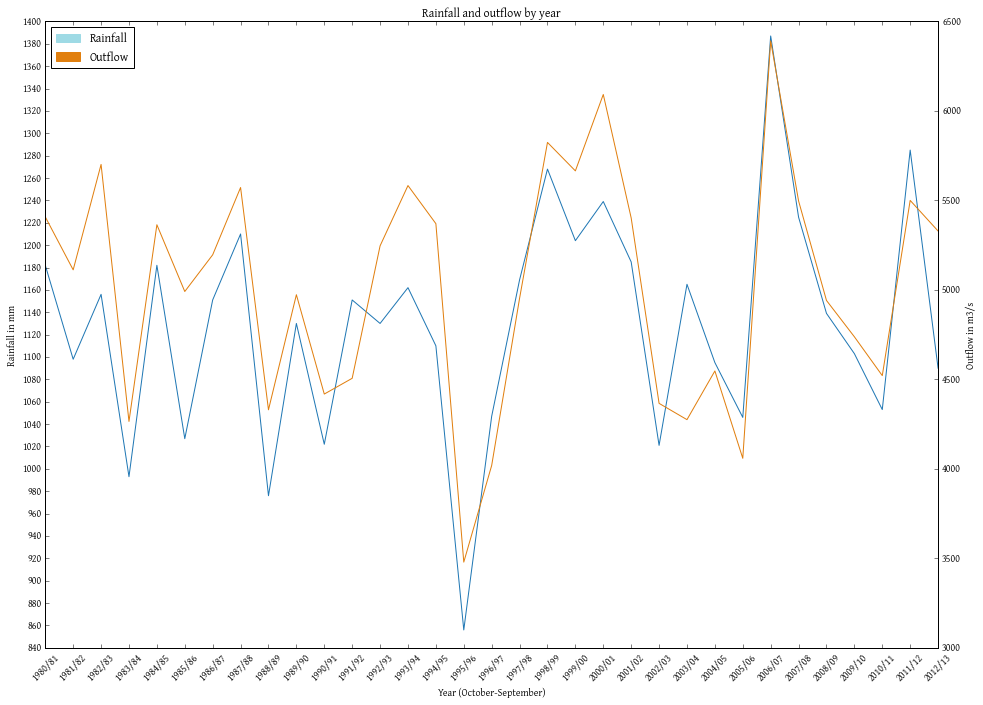

In [4]:
labels = list(rain_df['Water Year'])
# font to match font used in blog!
plt.rcParams["font.family"] = "Gentium Basic"

fig = plt.figure(figsize=(16, 12),dpi=300)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Rainfall and outflow by year')
ax.set_xlabel('Year (October-September)')
ax.set_ylabel('Rainfall in mm')
ax.plot(rain_df['Rain (mm) Oct-Sep'],color=(31/255., 119/255., 180/255.))
plt.locator_params(nbins=len(labels))
ax.set_xticklabels(labels,rotation=45)

ax2 = ax.twinx()
ax2.plot(rain_df['Outflow (m3/s) Oct-Sep'],color=((225/255., 127/255., 14/255.)))
ax2.set_ylabel('Outflow in m3/s')

rf = mpatches.Patch(color=(158/255., 218/255., 229/255.), label='Rainfall')
of = mpatches.Patch(color=(225/255., 127/255., 14/255.), label='Outflow')

plt.legend(handles=[rf,of],loc='upper left')

fig1 = plt.gcf()
plt.show()
fig1.savefig('./artwork/Rainfall and outflow by year.pdf')

<h2>Features</h2>
<p>
    <ul>
        <li>Drought in 1995</li>
        <li>Rainfall/outflow apear very closely related</li>
        <li>Potential flooding in 2003 as rainfall greatly exceeded outflow?</li>
        <li>2006/07 highest rain/outflow - more flooding?</li>
        <li>Seems a larger gap between rainfall/outflow till circa 1995</li>
    </ul>
</p>

In [5]:
rm=rain_df['Rain (mm) Oct-Sep'].describe()

In [6]:
# min
rain_df[rain_df['Rain (mm) Oct-Sep']==rm['min']]

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
15,1995/96,856,3479,245,5515,172,1439


In [7]:
# max
rain_df[rain_df['Rain (mm) Oct-Sep']==rm['max']]

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
26,2006/07,1387,6391,437,10926,357,5168


In [8]:
om=rain_df['Outflow (m3/s) Oct-Sep'].describe()

In [9]:
# min
rain_df[rain_df['Outflow (m3/s) Oct-Sep']==om['min']]

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
15,1995/96,856,3479,245,5515,172,1439


In [10]:
rain_df[rain_df['Outflow (m3/s) Oct-Sep']==om['max']]

,Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
26,2006/07,1387,6391,437,10926,357,5168


<h2>Max and min rainfall and outflow</h2>
<p>
    <ul>
        <li>Max rainfall and max outflow year 2006/07</li>
        <li>Min rainfall and min outflow year 1995/96</li>
    </ul>
</p>

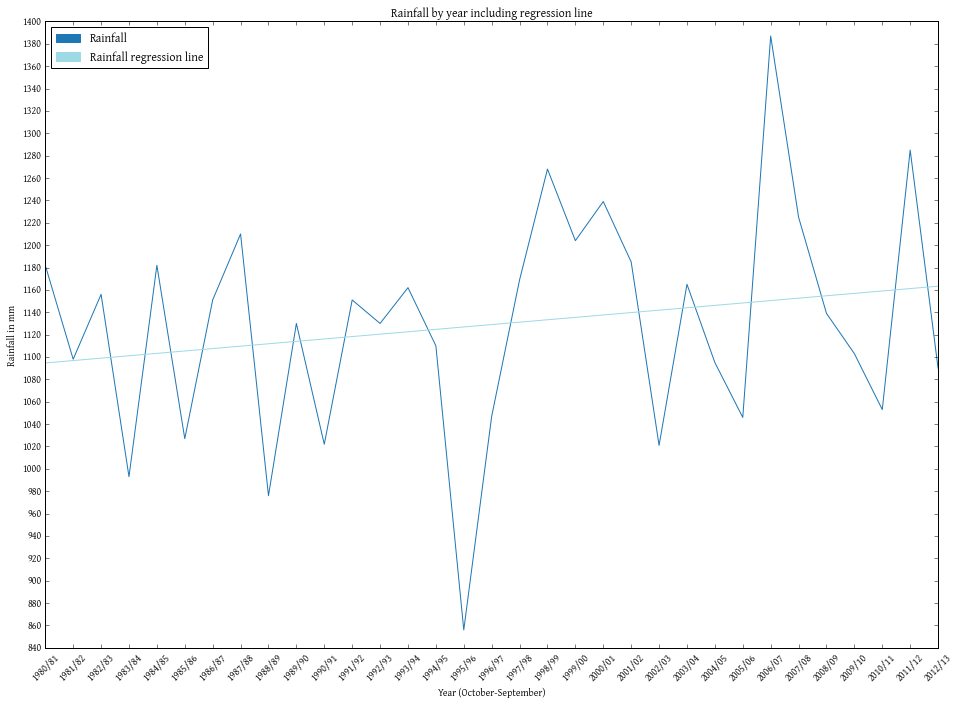

P-value=0.255814320042


In [11]:
fig = plt.figure(figsize=(16, 12),dpi=300)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Rainfall by year including regression line')
ax.set_xlabel('Year (October-September)')
ax.set_ylabel('Rainfall in mm')

ax.plot(rain_df['Rain (mm) Oct-Sep'],color=(31/255., 119/255., 180/255.))

plt.locator_params(nbins=len(labels))
ax.set_xticklabels(labels,rotation=45)

x = np.array(range(len(rain_df['Rain (mm) Oct-Sep'])))
y = np.array(list(rain_df['Rain (mm) Oct-Sep']))
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
ax.plot(x, predict_y, 'k-',color=(158/255., 218/255., 229/255.))

rg = mpatches.Patch(color=(158/255., 218/255., 229/255.), label='Rainfall regression line')
rf = mpatches.Patch(color=(31/255., 119/255., 180/255.), label='Rainfall')

plt.legend(handles=[rf,rg],loc='upper left')

fig1 = plt.gcf()
plt.show()
fig1.savefig('./artwork/Rainfall by year including regression line.pdf')
print("P-value=" + str(p_value))

<h2>Rainfall trend</h2>
<p>An upwards trend. P-value indicates that based on this dataset we cannot reject the null that rainfall is not linked to time (that is, though the regression line shows rainfall increasing year-on-year this increase is not statistically significant - essentially this data does not suggest rainfall is increasing with time).</p>
<p>It is tempting to consider 1995/96 and 2006/07 as outliers, to remove them and see what happens.</p>

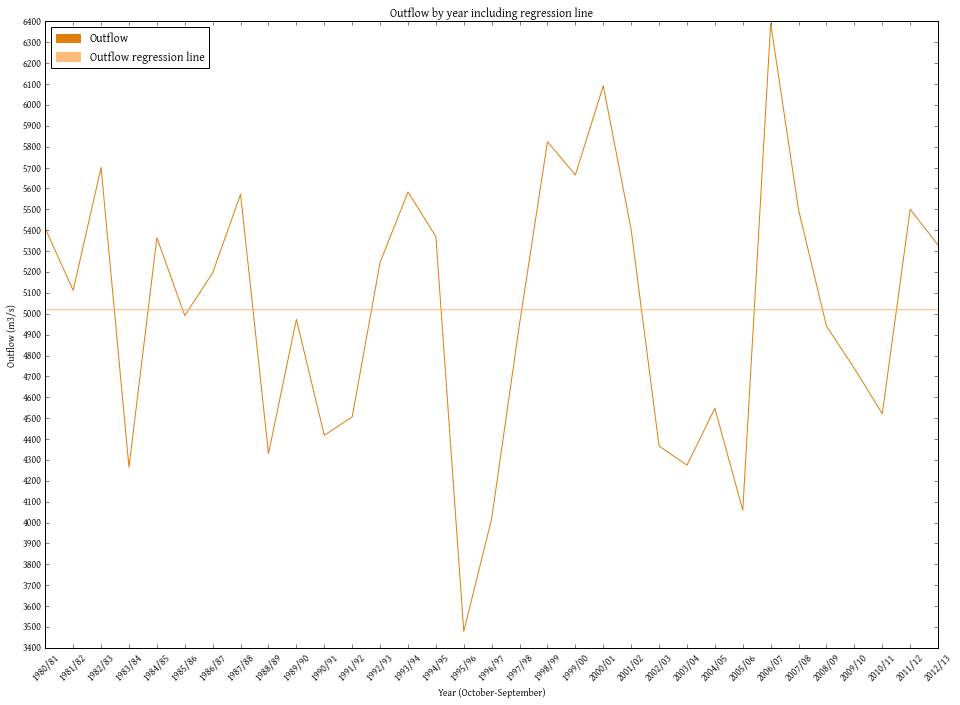

P-value=0.999178262279


In [16]:
fig = plt.figure(figsize=(16, 12),dpi=300)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Outflow by year including regression line')
ax.set_xlabel('Year (October-September)')
ax.set_ylabel('Outflow (m3/s)')

ax.plot(rain_df['Outflow (m3/s) Oct-Sep'],color=((225/255., 127/255., 14/255.)))

plt.locator_params(nbins=len(labels))
ax.set_xticklabels(labels,rotation=45)

x = np.array(range(len(rain_df['Outflow (m3/s) Oct-Sep'])))
y = np.array(list(rain_df['Outflow (m3/s) Oct-Sep']))
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
ax.plot(x, predict_y, 'k-',color=(255/255., 187/255., 120/255.))

rg = mpatches.Patch(color=(255/255., 187/255., 120/255.), label='Outflow regression line')
rf = mpatches.Patch(color=(225/255., 127/255., 14/255.), label='Outflow')

plt.legend(handles=[rf,rg],loc='upper left')

fig1 = plt.gcf()
plt.show()
fig1.savefig('./artwork/Outflow by year including regression line.pdf')
print("P-value=" + str(p_value))

In [14]:
# is there a slope?!
print("Slope=" + str(slope))

Slope=0.0127005347594


In [15]:
# very slight. High p-value - data does not suggest link between time and slight rise in outflow

In [17]:
rain_df['Rain (mm) Oct-Sep'].describe()

count      33.000000
mean     1129.000000
std       101.900074
min       856.000000
25%      1053.000000
50%      1139.000000
75%      1182.000000
max      1387.000000
Name: Rain (mm) Oct-Sep, dtype: float64

In [19]:
rain_df['Outflow (m3/s) Oct-Sep'].describe()

count      33.000000
mean     5019.181818
std       658.587762
min      3479.000000
25%      4506.000000
50%      5112.000000
75%      5497.000000
max      6391.000000
Name: Outflow (m3/s) Oct-Sep, dtype: float64